Instructions: answer the following questions with data and visuals (where appropriate)
==

* Give an overall summary of your performance from HW2 on the dataset
* Do you see any areas for improvement?
* Run k-Means on the dataset and describe your results
* Run PCA on the dataset and describe your results
* Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.
* Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, with the PCA features instead of your old features. Describe your results.
* Give your conclusions on the use of k-Means and PCA on the Diabetes dataset


### Note: you should know by now, but here is the order of importance: ###

* Your analysis (there is no "right" answer, only good and bad defense of it)
* Your visuals
* Your coding implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set plotting style to preference
plt.style.use('ggplot')

/Users/lkikuchi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# read the data
names = ['preg','glucose','dbp','tsf','insulin','bmi','pedigree','age','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', names=names)

In [3]:
# drop missing values 
# replace 0s in glucose, dbp, and bmi
df = df.replace({'glucose':{0:np.nan},'dbp':{0:np.nan},'bmi':{0:np.nan}})
# drop na
df = df.dropna()

In [4]:
# since all rows where tsf is 0 also has 0 for insulin, these are not great rows.  drop tsf 0 
df = df.replace({'tsf':{0:np.nan}})
df = df.dropna()

In [5]:
df.describe()

,preg,glucose,dbp,tsf,insulin,bmi,pedigree,age,class
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Set up the train test data
from sklearn.cross_validation import train_test_split

y, X = df['class'], df.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [7]:
# impute with mean for insulin 
X_train = X_train.replace({'insulin':{0:X_train[X_train['insulin']<>0]['insulin'].mean()}})
X_test = X_test.replace({'insulin':{0:X_test[X_test['insulin']<>0]['insulin'].mean()}})

In [8]:
# standardization: bring all of our features onto the same scale
# this makes it easier for ML algorithms to learn
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

1. Give an overall summary of your performance from HW2 on the dataset
==

* We found that considering time and performance, logistic regression seemed to be the best model, with 78.5% accuracy, 84.1% recall, 58.2% f1
* Overall, most models suffered from high bias, except perhaps random forest which showed high variance

2. Do you see any areas for improvement?
==

* Further feature engineering may help the bias issues
* Trying different ways to deal with null values (dropping vs imputing the mean) could help

3. Run k-Means on the dataset and describe your results
==

In [9]:
from sklearn.cluster import KMeans

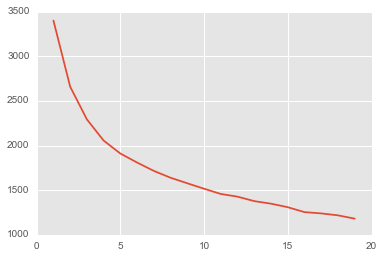

In [10]:
# look for the elbow!
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,20):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train_std)
    x.append(n)
    y.append(km2.inertia_)
plt.plot(x, y)

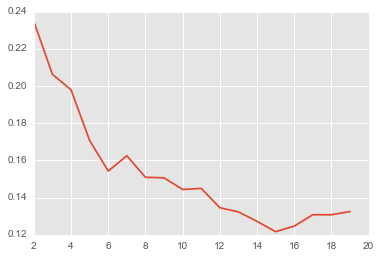

In [11]:
# chec silhouette scores - looks like 2 wins, though we could try 3 and 4
from sklearn.metrics import silhouette_score
x = []
y = []
for n in range(2,20):
    km2 = KMeans(n_clusters=n)
    centers = km2.fit_predict(X_train_std)
    x.append(n)
    y.append(silhouette_score(X_train_std, centers))
plt.plot(x, y)

In [12]:
# get the cluster centers in the original scale
# this means you will have k cluster centers
# we pick k=2 based on silhouette score and elbow method
km = KMeans(n_clusters=2, n_init=20)
km.fit(X_train_std)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): stdsc.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=X.columns)

,0,1
preg,2.224,5.514
glucose,107.656,142.543
dbp,66.624,78.891
tsf,25.708,34.571
insulin,124.915,210.458
bmi,30.719,36.125
pedigree,0.421,0.610
age,26.112,40.171


4. Run PCA on the dataset and describe your results
==

In [13]:
from sklearn.decomposition import PCA

In [14]:
# pca with max components (number of features)
n_pc = X_train.shape[1]

pca = PCA(n_components=n_pc, whiten=True)
pca.fit(X_train_std)

PCA(copy=True, n_components=8, whiten=True)

In [15]:
# the first 5 components explain over 80% of the variance
pca.explained_variance_ratio_

array([ 0.31193517,  0.1905221 ,  0.14766537,  0.11066947,  0.09482265,
        0.05998193,  0.04522802,  0.03917528])

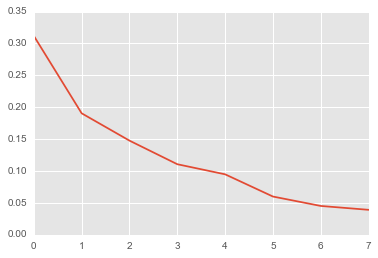

In [16]:
# plot the explained variance ratio
plt.plot(range(n_pc), pca.explained_variance_ratio_)

In [17]:
pd.DataFrame(pca.components_, columns=X.columns)

,preg,glucose,dbp,tsf,insulin,bmi,pedigree,age
0,0.313,0.417,0.342,0.379,0.326,0.368,0.235,0.414
1,-0.541,0.013,-0.145,0.402,0.115,0.476,0.216,-0.489
2,0.189,-0.483,0.300,0.351,-0.610,0.327,-0.187,0.070
3,-0.182,0.155,0.279,0.000,0.281,0.120,-0.875,-0.080
4,0.347,-0.002,-0.796,0.361,0.073,0.080,-0.302,0.111
5,-0.134,0.737,-0.064,0.087,-0.640,-0.102,-0.079,-0.027
6,-0.508,-0.156,0.026,0.490,0.052,-0.497,-0.008,0.477
7,-0.380,-0.044,-0.235,-0.441,-0.109,0.503,-0.022,0.582


5. Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.
==

In [18]:
# append the labels to a new k means dataframe
X_train_km = X_train.copy()
X_train_km['labels'] = km.labels_

# fit the test data to the clusters
X_test_km = X_test.copy()
X_test_km['labels'] = km.predict(X_test_std)

In [19]:
# 10 cross validation iterations with 20% test / 80% train
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [20]:
# import model metrics tools
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [21]:
# use the new data with the labels added
X_train_km.describe()

,preg,glucose,dbp,tsf,insulin,bmi,pedigree,age,labels
count,425.000,425.000,425.000,425.000,425.000,425.000,425.000,425.000,425.000
mean,3.579,122.021,71.675,29.358,160.139,32.945,0.499,31.901,0.412
std,3.361,30.996,12.117,10.427,104.905,6.902,0.348,10.985,0.493
min,0.000,56.000,30.000,7.000,14.000,18.200,0.085,21.000,0.000
25%,1.000,99.000,64.000,22.000,99.000,28.000,0.255,24.000,0.000
50%,2.000,117.000,72.000,30.000,160.139,33.100,0.412,28.000,0.000
75%,6.000,143.000,80.000,36.000,166.000,36.900,0.647,38.000,1.000
max,17.000,198.000,110.000,99.000,846.000,67.100,2.420,81.000,1.000


In [22]:
# standardize the new text and train
X_train_std_km = stdsc.fit_transform(X_train_km)
# transform the testing features in the same way
X_test_std_km = stdsc.transform(X_test_km)

Try "worst" performing model from HW2 solutions:

Gaussian Naive Bayes
* 75.7% accuracy, 67.9% recall, 59.4% f1
* 405 µs per loop
     

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std_km, y_train)

GaussianNB()

In [24]:
print classification_report(gnb.predict(X_test_std_km), y_test)
scores = cross_val_score(gnb, X_train_std_km, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
gnb.score(X_test_std_km, y_test)

             precision    recall  f1-score   support

          0       0.80      0.80      0.80        71
          1       0.61      0.61      0.61        36

avg / total       0.74      0.74      0.74       107

CV score [ 0.70588235  0.68235294  0.74117647  0.70588235  0.8         0.77647059
  0.69411765  0.70588235  0.65882353  0.65882353], Average score 0.712941176471


0.73831775700934577

In [25]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

metrics = list(precision_recall_fscore_support(gnb.predict(X_test_std_km), y_test, average='binary'))[:3]
metrics.append(accuracy_score(gnb.predict(X_test_std_km), y_test))

In [26]:
t = %timeit -o gnb.fit(X_train_std_km, y_train)
metrics.append(t.best)

1000 loops, best of 3: 425 µs per loop


In [27]:
# display 6 decimals
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [28]:
model_stats = pd.DataFrame(metrics,columns=['km_gnb'],index=['precision','recall','fscore','accuracy','time'])
model_stats

,km_gnb
precision,0.611111
recall,0.611111
fscore,0.611111
accuracy,0.738318
time,0.000425


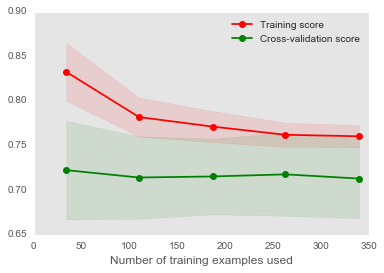

In [29]:
from sk_modelcurves.learning_curve import draw_learning_curve
draw_learning_curve(gnb, X_train_std_km, y_train, cv=cv);

In [30]:
# the new feature has high correlation with several features, and seems ot hurt NB
X_train_km.corr()

,preg,glucose,dbp,tsf,insulin,bmi,pedigree,age,labels
preg,1.000000,0.167729,0.226610,0.094622,0.042267,0.007284,0.035493,0.627977,0.482368
glucose,0.167729,1.000000,0.200732,0.210445,0.499588,0.206865,0.208571,0.324960,0.554583
dbp,0.226610,0.200732,1.000000,0.175312,0.090188,0.267309,0.057604,0.361651,0.498863
tsf,0.094622,0.210445,0.175312,1.000000,0.143510,0.634636,0.192583,0.154310,0.418839
insulin,0.042267,0.499588,0.090188,0.143510,1.000000,0.186528,0.154147,0.183792,0.401792
bmi,0.007284,0.206865,0.267309,0.634636,0.186528,1.000000,0.190740,0.057776,0.385908
pedigree,0.035493,0.208571,0.057604,0.192583,0.154147,0.190740,1.000000,0.098406,0.267993
age,0.627977,0.324960,0.361651,0.154310,0.183792,0.057776,0.098406,1.000000,0.630651
labels,0.482368,0.554583,0.498863,0.418839,0.401792,0.385908,0.267993,0.630651,1.000000


Try "best" performing model from HW2 solutions:

Logistic Regression
* 78.5% accuracy, 84.2% recall, 58.2% f1
* 612 µs per loop

In [31]:
# Logistic Regression with ridge and lasso
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
parameters = {'penalty': ['l1','l2'], 'C':np.linspace(0.1,2.0,50)}
clf = GridSearchCV(logreg, parameters, cv=cv)
clf.fit(X_train_std_km, y_train)

GridSearchCV(cv=ShuffleSplit(425, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.1    ,  0.13878,  0.17755,  0.21633,  0.2551 ,  0.29388,
        0.33265,  0.37143,  0.4102 ,  0.44898,  0.48776,  0.52653,
        0.56531,  0.60408,  0.64286,  0.68163,  0.72041,  0.75918,
        0.79796,  0.83673,  0.87551,  0.91429,  0.95306, ...98 ,
        1.72857,  1.76735,  1.80612,  1.8449 ,  1.88367,  1.92245,
        1.96122,  2.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [32]:
# get the best performing combo
clf.best_params_

{'C': 0.17755102040816328, 'penalty': 'l1'}

In [33]:
best_logreg = clf.best_estimator_

In [34]:
# see which coefficients have the biggest weights
pd.DataFrame({'features': X_train_km.columns, 'coefs': best_logreg.coef_[0]}).sort_values(by='coefs',ascending=False)

,coefs,features
1,0.879722,glucose
5,0.288875,bmi
6,0.273193,pedigree
7,0.261794,age
0,0.235793,preg
8,0.133552,labels
3,0.117462,tsf
4,0.000000,insulin
2,-0.029324,dbp


In [35]:
print classification_report(best_logreg.predict(X_test_std_km), y_test)
scores = cross_val_score(best_logreg, X_train_std_km, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
best_logreg.score(X_test_std_km, y_test)

             precision    recall  f1-score   support

          0       0.94      0.78      0.85        86
          1       0.47      0.81      0.60        21

avg / total       0.85      0.79      0.80       107

CV score [ 0.71764706  0.77647059  0.76470588  0.71764706  0.8         0.76470588
  0.74117647  0.71764706  0.71764706  0.72941176], Average score 0.744705882353


0.78504672897196259

In [36]:
metrics = list(precision_recall_fscore_support(best_logreg.predict(X_test_std_km), y_test, average='binary'))[:3]
metrics.append(accuracy_score(best_logreg.predict(X_test_std_km), y_test))

In [37]:
t = %timeit -o best_logreg.fit(X_train_std_km, y_train)

100 loops, best of 3: 851 µs per loop


In [38]:
metrics.append(t.best)
model_stats['km_logreg'] = metrics
model_stats

,km_gnb,km_logreg
precision,0.611111,0.472222
recall,0.611111,0.809524
fscore,0.611111,0.596491
accuracy,0.738318,0.785047
time,0.000425,0.000851


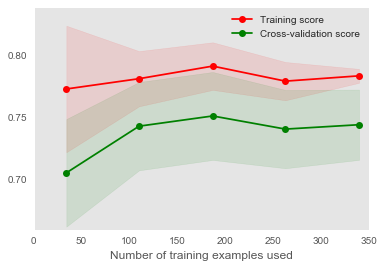

In [39]:
draw_learning_curve(best_logreg, X_train_std_km, y_train, cv=cv);

In [40]:
# try random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
parameters = {'n_estimators':range(20,50,2), 'min_samples_split':range(2,10),'min_samples_leaf':range(1,3)}
clf = GridSearchCV(rf, parameters)
clf.fit(X_train_std_km, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [41]:
# get the best performing combo
clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 44}

In [42]:
best_rf = clf.best_estimator_

In [43]:
print classification_report(best_rf.predict(X_test_std_km), y_test)

             precision    recall  f1-score   support

          0       0.90      0.82      0.86        78
          1       0.61      0.76      0.68        29

avg / total       0.82      0.80      0.81       107



In [44]:
metrics = list(precision_recall_fscore_support(best_rf.predict(X_test_std_km), y_test, average='binary'))[:3]
metrics.append(accuracy_score(best_rf.predict(X_test_std_km), y_test))

In [45]:
# time the model
t = %timeit -o best_rf.fit(X_train_std_km, y_train)

10 loops, best of 3: 85.4 ms per loop


In [46]:
metrics.append(t.best)
model_stats['km_rf'] = metrics
model_stats

,km_gnb,km_logreg,km_rf
precision,0.611111,0.472222,0.611111
recall,0.611111,0.809524,0.758621
fscore,0.611111,0.596491,0.676923
accuracy,0.738318,0.785047,0.803738
time,0.000425,0.000851,0.085363


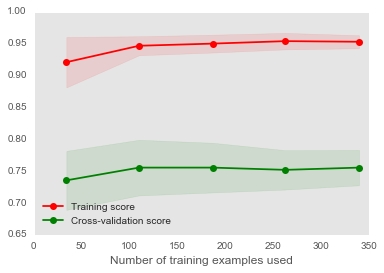

In [47]:
draw_learning_curve(best_rf, X_train_std_km, y_train, cv=cv);

In [48]:
features = X_train_km.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,glucose,0.257322
7,age,0.139054
8,labels,0.112052
6,pedigree,0.110842
4,insulin,0.096315
5,bmi,0.093124
3,tsf,0.071389
0,preg,0.061809
2,dbp,0.058093


6. Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, with the PCA features instead of your old features. Describe your results.
==

In [49]:
# run PCA using the top 5 features, as we saw that it explained over 80% variance
pca = PCA(n_components=5, whiten=True)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

In [50]:
pd.DataFrame(X_train_std_pca).describe()

,0,1,2,3,4
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.000000,-0.000000,0.000000,-0.000000,0.000000
std,1.001179,1.001179,1.001179,1.001179,1.001179
min,-2.172997,-3.323577,-5.145009,-5.073210,-2.965732
25%,-0.756500,-0.630920,-0.522273,-0.517409,-0.618574
50%,-0.081507,-0.024502,0.029269,0.137361,0.026541
75%,0.745563,0.626604,0.640965,0.663824,0.601164
max,2.929575,4.039223,2.810288,2.983671,3.591279


In [51]:
# Try Gaussian Naive Bayes with the 5 principal components
gnb.fit(X_train_std_pca, y_train)

GaussianNB()

In [52]:
print classification_report(gnb.predict(X_test_std_pca), y_test)
scores = cross_val_score(gnb, X_train_std_pca, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
gnb.score(X_test_std_pca, y_test)

             precision    recall  f1-score   support

          0       0.87      0.78      0.83        79
          1       0.53      0.68      0.59        28

avg / total       0.78      0.76      0.77       107

CV score [ 0.72941176  0.75294118  0.78823529  0.68235294  0.85882353  0.78823529
  0.69411765  0.63529412  0.67058824  0.69411765], Average score 0.729411764706


0.7570093457943925

In [53]:
metrics = list(precision_recall_fscore_support(gnb.predict(X_test_std_pca), y_test, average='binary'))[:3]
metrics.append(accuracy_score(gnb.predict(X_test_std_pca), y_test))

In [54]:
# time the model
t = %timeit -o gnb.fit(X_train_std_pca, y_train)

1000 loops, best of 3: 426 µs per loop


In [55]:
metrics.append(t.best)
model_stats['pca_gnb'] = metrics
model_stats

,km_gnb,km_logreg,km_rf,pca_gnb
precision,0.611111,0.472222,0.611111,0.527778
recall,0.611111,0.809524,0.758621,0.678571
fscore,0.611111,0.596491,0.676923,0.593750
accuracy,0.738318,0.785047,0.803738,0.757009
time,0.000425,0.000851,0.085363,0.000426


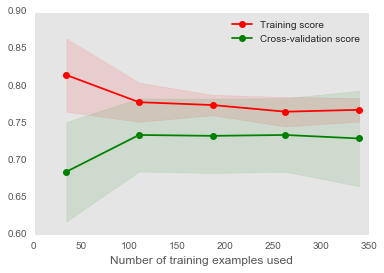

In [56]:
draw_learning_curve(gnb, X_train_std_pca, y_train, cv=cv);

In [57]:
# Logistic Regression with ridge and lasso
parameters = {'penalty': ['l1','l2'], 'C':np.linspace(0.05,0.5,50)}
clf = GridSearchCV(logreg, parameters, cv=cv)
clf.fit(X_train_std_pca, y_train)

GridSearchCV(cv=ShuffleSplit(425, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.05   ,  0.05918,  0.06837,  0.07755,  0.08673,  0.09592,
        0.1051 ,  0.11429,  0.12347,  0.13265,  0.14184,  0.15102,
        0.1602 ,  0.16939,  0.17857,  0.18776,  0.19694,  0.20612,
        0.21531,  0.22449,  0.23367,  0.24286,  0.25204, ...653,
        0.43571,  0.4449 ,  0.45408,  0.46327,  0.47245,  0.48163,
        0.49082,  0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [58]:
# get the best performing combo
clf.best_params_

{'C': 0.1142857142857143, 'penalty': 'l1'}

In [59]:
best_logreg = clf.best_estimator_

In [60]:
# see which coefficients have the biggest weights
pd.DataFrame({'features': pd.DataFrame(X_train_std_pca).columns, 'coefs': best_logreg.coef_[0]}).sort_values(by='coefs',ascending=False)

,coefs,features
0,1.220214,0
4,0.094735,4
1,0.000000,1
3,-0.082789,3
2,-0.204296,2


In [61]:
print classification_report(best_logreg.predict(X_test_std_pca), y_test)
scores = cross_val_score(best_logreg, X_train_std_pca, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
best_logreg.score(X_test_std_pca, y_test)

             precision    recall  f1-score   support

          0       0.94      0.76      0.84        88
          1       0.42      0.79      0.55        19

avg / total       0.85      0.77      0.79       107

CV score [ 0.71764706  0.75294118  0.78823529  0.74117647  0.84705882  0.81176471
  0.75294118  0.69411765  0.68235294  0.76470588], Average score 0.755294117647


0.76635514018691586

In [62]:
metrics = list(precision_recall_fscore_support(best_logreg.predict(X_test_std_pca), y_test, average='binary'))[:3]
metrics.append(accuracy_score(best_logreg.predict(X_test_std_pca), y_test))

In [63]:
# time the model
t = %timeit -o best_logreg.fit(X_train_std_pca, y_train)

1000 loops, best of 3: 531 µs per loop


In [64]:
metrics.append(t.best)
model_stats['pca_logreg'] = metrics
model_stats

,km_gnb,km_logreg,km_rf,pca_gnb,pca_logreg
precision,0.611111,0.472222,0.611111,0.527778,0.416667
recall,0.611111,0.809524,0.758621,0.678571,0.789474
fscore,0.611111,0.596491,0.676923,0.593750,0.545455
accuracy,0.738318,0.785047,0.803738,0.757009,0.766355
time,0.000425,0.000851,0.085363,0.000426,0.000531


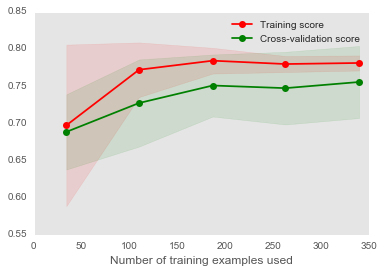

In [65]:
draw_learning_curve(best_logreg, X_train_std_pca, y_train, cv=cv);

In [66]:
# try random forest
rf = RandomForestClassifier(random_state=1)
parameters = {'n_estimators':range(20,50,2), 'min_samples_split':range(2,10),'min_samples_leaf':range(1,3)}
clf = GridSearchCV(rf, parameters)
clf.fit(X_train_std_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [67]:
# get the best performing combo
clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 34}

In [68]:
best_rf = clf.best_estimator_

In [69]:
print classification_report(best_rf.predict(X_test_std_pca), y_test)
scores = cross_val_score(best_rf, X_train_std_pca, y_train, cv=cv)
print('CV score {}, Average score {}'.format(scores, scores.mean()))
best_rf.score(X_test_std_pca, y_test)

             precision    recall  f1-score   support

          0       0.89      0.77      0.82        82
          1       0.47      0.68      0.56        25

avg / total       0.79      0.75      0.76       107

CV score [ 0.69411765  0.70588235  0.71764706  0.71764706  0.82352941  0.78823529
  0.72941176  0.70588235  0.64705882  0.71764706], Average score 0.724705882353


0.74766355140186913

In [70]:
metrics = list(precision_recall_fscore_support(best_rf.predict(X_test_std_pca), y_test, average='binary'))[:3]
metrics.append(accuracy_score(best_rf.predict(X_test_std_pca), y_test))

In [71]:
features = pd.DataFrame(X_train_std_pca).columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,0,0.434391
2,2,0.169239
1,1,0.142728
3,3,0.132883
4,4,0.120758


In [72]:
# time the model
t = %timeit -o best_rf.fit(X_train_std_pca, y_train)

10 loops, best of 3: 66.5 ms per loop


In [73]:
metrics.append(t.best)
model_stats['pca_rf'] = metrics
model_stats

,km_gnb,km_logreg,km_rf,pca_gnb,pca_logreg,pca_rf
precision,0.611111,0.472222,0.611111,0.527778,0.416667,0.472222
recall,0.611111,0.809524,0.758621,0.678571,0.789474,0.680000
fscore,0.611111,0.596491,0.676923,0.593750,0.545455,0.557377
accuracy,0.738318,0.785047,0.803738,0.757009,0.766355,0.747664
time,0.000425,0.000851,0.085363,0.000426,0.000531,0.066462


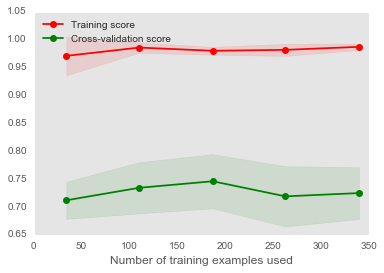

In [74]:
draw_learning_curve(best_rf, X_train_std_pca, y_train, cv=cv);

7. Give your conclusions on the use of k-Means and PCA on the Diabetes dataset
==

k-means and PCA have varying effects on performance depending on the model used.
k-means adds a correlated feature, which could help reduce bias but increase variance
* reduced performace of Gaussian NB
* increaced precision but reduced recall of logistic regreassion
* increased performance of random forest

PCA reduces features but ensures they are not correlated, which can increase bias but reduce variance
* didn't significantly change performance of Gaussian NB
* reduced performance of logistric regression with a sligt improvement in time
* reduced performance of random forest and increased time (due to higer number of trees as optimal param)

Overall, for this dataset k-means and PCA were not particularly benefical

In [75]:
model_stats['gnb_hw2'] = [5.27778000e-01,   6.78571000e-01,   5.93750000e-01, 7.57009000e-01,   3.83000000e-04]
model_stats['logreg_hw2'] = [4.44444000e-01,   8.42105000e-01,   5.81818000e-01, 7.85047000e-01,   6.14000000e-04]
model_stats['rf_hw2'] = [0.527778,  0.730769,  0.612903,  0.775701,  0.035311]

In [77]:
model_stats[['gnb_hw2','km_gnb','pca_gnb','logreg_hw2','km_logreg','pca_logreg','rf_hw2','km_rf','pca_rf']]

,gnb_hw2,km_gnb,pca_gnb,logreg_hw2,km_logreg,pca_logreg,rf_hw2,km_rf,pca_rf
precision,0.527778,0.611111,0.527778,0.444444,0.472222,0.416667,0.527778,0.611111,0.472222
recall,0.678571,0.611111,0.678571,0.842105,0.809524,0.789474,0.730769,0.758621,0.680000
fscore,0.593750,0.611111,0.593750,0.581818,0.596491,0.545455,0.612903,0.676923,0.557377
accuracy,0.757009,0.738318,0.757009,0.785047,0.785047,0.766355,0.775701,0.803738,0.747664
time,0.000383,0.000425,0.000426,0.000614,0.000851,0.000531,0.035311,0.085363,0.066462
